
# M2M100 Fune Tunningn Tigrina


### Mouting To Google

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Installing the required Packages and deperences such as Transformers, Torcch, dataset and evelation pakges bluesore

In [3]:
!pip install transformers
!pip install datasets
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
  

In [4]:
!pip install transformers datasets torch

In [5]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.8 MB/s eta 0:00:00


In [6]:
!pip install transformers datasets evaluate sacrebleu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.5 MB/s eta 0:00:00


## Importing the Nesssesary Libraries

In [7]:
import pandas as pd
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments, TrainerCallback
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import evaluate

In [8]:
# Load the dataset
file_path = '/content/drive/MyDrive/bible_data/bi_dat.csv'
df = pd.read_csv(file_path)

df = df.rename(columns={'EN': 'source', 'TI': 'target'})

# Make Sure DataFrame has the correct columns: Source(english) and target(tigrina)
if 'source' not in df.columns or 'target' not in df.columns:
    raise ValueError("DataFrame must contain 'source' and 'target' columns")

#  Split Data into 80/20 for training Testing
train_df, val_df = train_test_split(df, test_size=0.2)

# Convert DataFrames to Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

In [9]:
train_df.head()

,Unnamed: 0,verse_id,target,source,TI_tokenized
257,257,11711,ስጋ ዕልቦኹም ግዘሩ፡ እዚ ድማ ነቲ ኣብ መንጎይን መንጎኹምን ዘሎ ኺዳን ...,You shall be circumcised in the flesh of your ...,"['ስጋ', 'ዕልቦኹም', 'ግዘሩ', 'እዚ', 'ድማ', 'ነቲ', 'ኣብ',..."
55,55,1225,እቲ ሰብኣይን ሰበይቱን ድማ ኽልቲኦም ጥራዮም ነበሩ፡ ኣይሓንኩን ከኣ ነበሩ።,"Abraham said to his young men, ""Stay here with...","['እቲ', 'ሰብኣይን', 'ሰበይቱን', 'ድማ', 'ኽልቲኦም', 'ጥራዮም'..."
155,155,1820,ኖህ ድማ ንእግዚኣብሄር መሰውኢ ሰርሔ፡ ካብ ንጹህ እንስሳ ዘበለን ካብ ኵ...,"Noah built an altar to Yahweh, and took of eve...","['ኖህ', 'ድማ', 'ንእግዚኣብሄር', 'መሰውኢ', 'ሰርሔ', 'ካብ', ..."
556,556,12931,እግዚኣብሄር ከኣ ልያ ኸም እተጸልኤት ርእዩ፡ ማሕጸና ኸፈተላ። ራሄል ግና...,"Yahweh saw that Leah was hated, and he opened ...","['እግዚኣብሄር', 'ከኣ', 'ልያ', 'ኸም', 'እተጸልኤት', 'ርእዩ',..."
65,65,1410,ንሱ ኸኣ፥ እንታይ ጌርካ ኢኻ፧ ድምጺ ደም ሓውካ ኻብ ምድሪ ናባይ ይጠርዕ...,"Yahweh said, ""What have you done? The voice of...","['ንሱ', 'ኸኣ', 'እንታይ', 'ጌርካ', 'ኢኻ', 'ድምጺ', 'ደም',..."


##Concatnate  both Datset to creat more data now

In [39]:

# Load the CSV files into DataFrames
bi_dat_2_df = pd.read_csv('/content/drive/MyDrive/bible_data/bi_dat_2.csv')
combined_df = pd.read_csv('/content/drive/MyDrive/bible_data/combined_df.csv')

# Concatenate the DataFrames
combined_df = pd.concat([bi_dat_2_df, combined_df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('/content/drive/MyDrive/bible_data/combined_5k_dataset.csv', index=False)


## Loading and Data Preprocessing

In [8]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define global variables for metrics
training_loss_values = []
validation_loss_values = []

# Function to load and preprocess data
def load_and_preprocess_data(file_path, source_col, target_col):
    df = pd.read_csv(file_path)
    df = df.rename(columns={source_col: 'source', target_col: 'target'})
    train_df, val_df = train_test_split(df, test_size=0.2)
    train_dataset = Dataset.from_pandas(train_df)
    val_dataset = Dataset.from_pandas(val_df)
    return train_dataset, val_dataset

def add_tigrinya_token(tokenizer, model):
    if "ti" not in tokenizer.lang_code_to_token:
        tokenizer.lang_code_to_token["ti"] = "<ti>"
        tokenizer.lang_token_to_id["<ti>"] = len(tokenizer.lang_token_to_id)
        tokenizer.additional_special_tokens.append("<ti>")
        model.resize_token_embeddings(len(tokenizer))

def preprocess_function(examples, tokenizer, source_lang="en", target_lang="am", max_length=512):
    inputs = [ex for ex in examples['source']]
    targets = [ex for ex in examples['target']]
    model_inputs = tokenizer(inputs, text_target=targets, padding="max_length", truncation=True, max_length=max_length)
    return model_inputs


# Custom callback to store losses and accuracies
class SaveMetricsCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, **kwargs):
        metrics = kwargs["metrics"]
        validation_loss_values.append(metrics.get("eval_loss"))

    def on_log(self, args, state, control, logs=None, **kwargs):
        training_loss_values.append(logs.get("loss"))



## Model Traning and Fune Tunning with Hyperparameters

In [9]:
# Function to train the model
def train_model(model, tokenizer, train_dataset, val_dataset, output_dir, num_train_epochs=20, per_device_batch_size=8, learning_rate=2e-5):
    global training_loss_values, validation_loss_values
    training_loss_values = []
    validation_loss_values = []

    training_args = Seq2SeqTrainingArguments(
        output_dir=output_dir,
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=per_device_batch_size,
        per_device_eval_batch_size=per_device_batch_size,
        weight_decay=0.01,
        save_total_limit=5,
        num_train_epochs=num_train_epochs,
        predict_with_generate=True
    )

    trainer = Seq2SeqTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        callbacks=[SaveMetricsCallback]
    )

    trainer.train()
    return trainer

## Text Translating

In [10]:
# Function to translate texts using the model
def translate_texts(texts, model, tokenizer, source_lang="en", target_lang="am"):
    tokenizer.src_lang = source_lang
    encoded = tokenizer(texts, return_tensors="pt", padding=True).to(device)
    generated_tokens = model.generate(**encoded, forced_bos_token_id=tokenizer.get_lang_id(target_lang))
    translations = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
    return translations

## Evalution

In [11]:

# Function to evaluate the model
def evaluate_model(model, tokenizer, val_dataset, output_csv_path):
    predictions = []
    references = []

    for i in range(len(val_dataset)):
        source_texts = val_dataset[i]["source"]
        reference_texts = val_dataset[i]["target"]
        predicted_texts = translate_texts([source_texts], model, tokenizer, source_lang="en", target_lang="am")

        predictions.extend(predicted_texts)
        references.append(reference_texts)

    # Load the BLEU metric
    bleu = evaluate.load("sacrebleu")

    # Compute the BLEU score
    results = bleu.compute(predictions=predictions, references=[[ref] for ref in references])
    bleu_score = results["score"]

    # Prepare DataFrame
    df_results = pd.DataFrame({
        "Source Text": [val_dataset[i]["source"] for i in range(len(val_dataset))],
        "Reference Translation": references,
        "Predicted Translation": predictions,
        "BLEU Score": [bleu_score] * len(predictions)
    })

    # Save to CSV
    df_results.to_csv(output_csv_path, index=False)

    # Display the BLEU score
    print("BLEU score:", bleu_score)
    return df_results


Ploting Training And Validation Loss

In [12]:
# Function to plot metrics
def plot_metrics(training_loss_values, validation_loss_values):
    plt.figure()
    plt.plot(training_loss_values, label='Training Loss')
    plt.plot(validation_loss_values, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

Define Funtion for Running Experiments

In [13]:
# Function to run the complete experiment
def run_experiment(data_file_path, source_col, target_col, model_path, output_dir):
    # Load and preprocess data
    train_dataset, val_dataset = load_and_preprocess_data(data_file_path, source_col, target_col)
    tokenizer = M2M100Tokenizer.from_pretrained(model_path)
    model = M2M100ForConditionalGeneration.from_pretrained(model_path).to(device)

    train_dataset = train_dataset.map(lambda x: preprocess_function(x, tokenizer), batched=True)
    val_dataset = val_dataset.map(lambda x: preprocess_function(x, tokenizer), batched=True)

    # Train the model
    trainer = train_model(model, tokenizer, train_dataset, val_dataset, output_dir)

    # Evaluate the model and save results
    output_csv_path = output_dir + "/result_3.csv"
    df_results = evaluate_model(model, tokenizer, val_dataset, output_csv_path)

    # Save the fine-tuned model
    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

    # Plot metrics
    plot_metrics(training_loss_values, validation_loss_values)

    return df_results

Running the Actaually Expereimcnts and Svaing Result to directories

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/4028 [00:00<?, ? examples/s]

Map:   0%|          | 0/1007 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.044200,0.026262
2,0.037300,0.027228
3,0.031700,0.028721
4,0.029300,0.029372
5,0.024000,0.029850
6,0.020900,0.030692
7,0.019500,0.031595
8,0.016400,0.032180
9,0.015400,0.032724
10,0.014100,0.033153


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 200, 'early_stopping': True, 'num_beams': 5}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 200, 'early_stopping': True, 'num_beams': 5}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instea

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 200, 'early_stopping': True, 'num_beams': 5}


BLEU score: 51.96228629746209


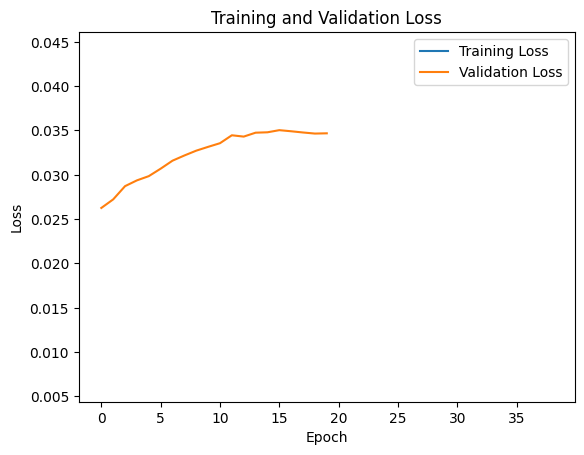

In [14]:
# Load the CSV files into DataFrames
bi_dat_2_df = pd.read_csv('/content/drive/MyDrive/bible_data/bi_dat_2.csv')
combined_df = pd.read_csv('/content/drive/MyDrive/bible_data/combined_df.csv')

# Concatenate the DataFrames
combined_df = pd.concat([bi_dat_2_df, combined_df], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_5k_dataset_path = '/content/drive/MyDrive/bible_data/combined_5k_dataset.csv'
combined_df.to_csv(combined_5k_dataset_path, index=False)

# Define the new data file path
data_file_path = combined_5k_dataset_path
source_col = "EN"
target_col = "TI"
model_path = "/content/drive/MyDrive/bible_data/m2m100_experiment_3"
output_dir = "/content/drive/MyDrive/bible_data/m2m100_experiment_3"

# Run the experiment
df_results = run_experiment(data_file_path, source_col, target_col, model_path, output_dir)



In [83]:
# Load the results CSV file into a DataFrame
df_results = pd.read_csv("/content/drive/MyDrive/bible_data/m2m100_experiment_3/result_2.csv")

# Print the DataFrame
print(df_results)

                                           Source Text  \
0    The families of the sons of Kohath shall encam...   
1    The priest who cleanses him shall set the man ...   
2    If he have no daughter, then you shall give hi...   
3    Moses and Aaron went from the presence of the ...   
4    Jair the son of Manasseh took all the region o...   
..                                                 ...   
767  Now Jethro, the priest of Midian, Moses'' fath...   
768  You shall make yourselves fringes on the four ...   
769  Yahweh said to Moses and to Aaron, "Take to yo...   
770  Sometimes the cloud was a few days on the tabe...   
771  They traveled from Mount Shepher, and encamped...   

                                 Reference Translation  \
0                     ዓሌታት ደቂ ቃሃት ንማሕደር ብሸነኽ ደቡቡ ይስፈሩ።   
1    እቲ ዜንጽህ ካህን ድማ ነቲ ዚነጽህ ሰብን ነዚ ነገርዝን ኣብ ቅድሚ እግዚ...   
2                     ጓል እንተ ዜብሉ ኸኣ፡ እቲ ርስቱ ነሕዋቱ ሀብዎም።   
3    ሙሴን ኣሮንን ከኣ ካብ ቅድሚ ማሕበር ናብ ኣፍ ድንኳን ምርኻብ ከዱ፡ ብገ...   
4    ያኢር ወዲ ም

In [ ]:
# Load the results CSV file into a DataFrame
df_results = pd.read_csv("/content/drive/MyDrive/bible_data/m2m100_experiment_3/result_2.csv")

# Print the DataFrame
print(df_results)


                                           Source Text  \
0    It came to pass, when they had taken them out,...   
1    It happened, whenever the stronger of the floc...   
2    God saw everything that he had made, and, beho...   
3    He told it to his father and to his brothers. ...   
4    I will go down now, and see whether their deed...   
..                                                 ...   
181  He said, "I am looking for my brothers. Tell m...   
182  The keeper of the prison committed to Joseph''...   
183  Then Jacob rose up, and set his sons and his w...   
184  They took the coat of many colors, and they br...   
185  Mahalalel lived after he became the father of ...   

                                 Reference Translation  \
0    ኰነ ኸኣ፡ ናብ ወጻኢ ምስ ኣውጽእዎም፡ ነፍስኻ ኣድሕን፡ ንድሕሪት ገጽካ ...   
1    ኰነ ድማ፡ በቲ እተን ጽዓኛታት ኣባጊዕ ዚትለዋሉ ዘበለ ጊዜ ኣብ ጥቓ እቲ...   
2    ኣምላኽ ከኣ ዝገበሮ ዘበለ ዅሉ ረኣየ፡ እንሆ፡ ብዙሕ ጽቡቕ ኰነ። ምሸት ...   
3    ነቦኡን ነሕዋቱን ድማ ነገሮም፡ ኣቦኡ ኸኣ ገንሖ፡ እዚ ዝሐለምካዮ እንታይ...   
4    ስለዚ ኸምቲ 

In [54]:
# Load the results CSV file into a DataFrame
df_results = pd.read_csv("/content/drive/MyDrive/bible_data/m2m100_experiment_3/result_2.csv")

# Print the DataFrame
print(df_results)

                                           Source Text  \
0    It came to pass, when they had taken them out,...   
1    It happened, whenever the stronger of the floc...   
2    God saw everything that he had made, and, beho...   
3    He told it to his father and to his brothers. ...   
4    I will go down now, and see whether their deed...   
..                                                 ...   
181  He said, "I am looking for my brothers. Tell m...   
182  The keeper of the prison committed to Joseph''...   
183  Then Jacob rose up, and set his sons and his w...   
184  They took the coat of many colors, and they br...   
185  Mahalalel lived after he became the father of ...   

                                 Reference Translation  \
0    ኰነ ኸኣ፡ ናብ ወጻኢ ምስ ኣውጽእዎም፡ ነፍስኻ ኣድሕን፡ ንድሕሪት ገጽካ ...   
1    ኰነ ድማ፡ በቲ እተን ጽዓኛታት ኣባጊዕ ዚትለዋሉ ዘበለ ጊዜ ኣብ ጥቓ እቲ...   
2    ኣምላኽ ከኣ ዝገበሮ ዘበለ ዅሉ ረኣየ፡ እንሆ፡ ብዙሕ ጽቡቕ ኰነ። ምሸት ...   
3    ነቦኡን ነሕዋቱን ድማ ነገሮም፡ ኣቦኡ ኸኣ ገንሖ፡ እዚ ዝሐለምካዮ እንታይ...   
4    ስለዚ ኸምቲ 

18000 dataset

In [18]:
# Load the results CSV file into a DataFrame
df_results = pd.read_csv("/content/drive/MyDrive/bible_data/m2m100_experiment_3/result_2.csv")

# Print the DataFrame
print(df_results)

                                           Source Text  \
0    You shall teach them your children, talking of...   
1                     Issachar, Zebulun, and Benjamin,   
2    one young bull, one ram, one male lamb a year ...   
3    Yahweh will scatter you among all peoples, fro...   
4    They came to Balaam, and said to him, Thus say...   
..                                                 ...   
767  but you shall offer a burnt offering for a swe...   
768  Moses said to Hobab, the son of Reuel the Midi...   
769  Moses said to Aaron, "What did these people do...   
770  then he shall confess his sin which he has don...   
771  "Don''t cut off the tribe of the families of t...   

                                 Reference Translation  \
0    ኣብ ቤትካ ኾፍ ምስ በልካን ኣብ መገዲ ኽትከይድ ከሎኻን ኣብ በጥ ምባልካ...   
1                                 ይሳኮር፡ ዛብሎን፡ ብንያም ድማ፡   
2            ንዚሐርር መስዋእቲ ሓደ ዝራብዕ፡ ሓደ ድዑል፡ ሓደ ገንሸል ዓመት፡   
3    እግዚኣብሄር ድማ ካብ ወሰን ምድሪ ኽሳዕ ወሰን ምድሪ ናብ ኵሎም ህዝብታት...   
4    ናብ በላዓም 

In [19]:
df_results

,Source Text,Reference Translation,Predicted Translation,BLEU Score
0,"You shall teach them your children, talking of...",ኣብ ቤትካ ኾፍ ምስ በልካን ኣብ መገዲ ኽትከይድ ከሎኻን ኣብ በጥ ምባልካ...,ኣብ ቤትካ ኽትሰፍሮን ኣብ መገዲ ኽትከይድ ከሎኻን ኣብ ምድሪ ደቅኻን ኣብ...,30.572681
1,"Issachar, Zebulun, and Benjamin,",ይሳኮር፡ ዛብሎን፡ ብንያም ድማ፡,ይሳኮር፡ ዛብሎንን ብንያም፡,30.572681
2,"one young bull, one ram, one male lamb a year ...",ንዚሐርር መስዋእቲ ሓደ ዝራብዕ፡ ሓደ ድዑል፡ ሓደ ገንሸል ዓመት፡,ንዚሐርር መስዋእቲ ሓደ ዝራብዕ፡ ሓደ ድዑል፡ ሓደ ገንሸል ዓመት፡,30.572681
3,"Yahweh will scatter you among all peoples, fro...",እግዚኣብሄር ድማ ካብ ወሰን ምድሪ ኽሳዕ ወሰን ምድሪ ናብ ኵሎም ህዝብታት...,እግዚኣብሄር ካብ ሓደ ወሰን ምድሪ ኽሳዕ እቲ ኻልኣይ ወሰን ምድሪ ናብ ማ...,30.572681
4,"They came to Balaam, and said to him, Thus say...",ናብ በላዓም መጺኦም ከኣ፡ ባላቅ ወዲ ጺጶር፡ በጃኻ፡ ናባይ ካብ ምምጻእ ...,ናብ በላዓም ከኣ መጺኦም፡ ባላቅ ወዲ ጺፎር ከምዚ ይብል፡ በጃኻ፡ ናባይ ...,30.572681
...,...,...,...,...
767,but you shall offer a burnt offering for a swe...,ግናኸ ዚሐርር መስዋእቲ ንእግዚኣብሄር ንጥዑም ጨና ኽልተ ዝራብዕ ሓደ ድዑ...,ንእግዚኣብሄር ንጥዑም ጨና ዚሐርር መስዋእቲ፡ ክልተ ዝራብዕ፡ ሓደ ድዑል፡...,30.572681
768,"Moses said to Hobab, the son of Reuel the Midi...",ሙሴ ኸኣ ንሖባብ ወዲ ረዑኤል ሚድያናዊ፡ ሓሙ ሙሴ፡ ንሕና ናብታ እግዚኣብ...,ሙሴ ኸኣ ንሆባብ ወዲ ረዑኤል ሚድያናዊ፡ ሓሙ ሙሴ፡ ናብታ እግዚኣብሄር፡ ...,30.572681
769,"Moses said to Aaron, ""What did these people do...",ሙሴ ድማ ንኣሮን፡ እዚ ዓብዪ ሓጢያት ዘምጻእካሉስ እዚ ህዝብዚ እንታይ ገ...,ሙሴ ድማ ንኣሮን፡ እዚ ህዝቢ እዚ፡ ዓብዪ ሓጢኣት ዘምጽኣሎም፡ እንታይ ገ...,30.572681
770,then he shall confess his sin which he has don...,ሽዑ በቲ ዝገበርዎ ሓጢኣቶም ይናዘዙ፡ እቲ ዝበደሎ ብመልኡ ይምለሶ ኣብ ል...,ሽዑ ነቲ ዝገበሮ ሓጢኣቱ ይናዘዝ፡ እቲ በዳሉ ኸኣ ብመልኡ ይኽሐስ፡ ኣብ ...,30.572681


In [20]:
df_results.head(20)

,Source Text,Reference Translation,Predicted Translation,BLEU Score
0,"You shall teach them your children, talking of...",ኣብ ቤትካ ኾፍ ምስ በልካን ኣብ መገዲ ኽትከይድ ከሎኻን ኣብ በጥ ምባልካ...,ኣብ ቤትካ ኽትሰፍሮን ኣብ መገዲ ኽትከይድ ከሎኻን ኣብ ምድሪ ደቅኻን ኣብ...,30.572681
1,"Issachar, Zebulun, and Benjamin,",ይሳኮር፡ ዛብሎን፡ ብንያም ድማ፡,ይሳኮር፡ ዛብሎንን ብንያም፡,30.572681
2,"one young bull, one ram, one male lamb a year ...",ንዚሐርር መስዋእቲ ሓደ ዝራብዕ፡ ሓደ ድዑል፡ ሓደ ገንሸል ዓመት፡,ንዚሐርር መስዋእቲ ሓደ ዝራብዕ፡ ሓደ ድዑል፡ ሓደ ገንሸል ዓመት፡,30.572681
3,"Yahweh will scatter you among all peoples, fro...",እግዚኣብሄር ድማ ካብ ወሰን ምድሪ ኽሳዕ ወሰን ምድሪ ናብ ኵሎም ህዝብታት...,እግዚኣብሄር ካብ ሓደ ወሰን ምድሪ ኽሳዕ እቲ ኻልኣይ ወሰን ምድሪ ናብ ማ...,30.572681
4,"They came to Balaam, and said to him, Thus say...",ናብ በላዓም መጺኦም ከኣ፡ ባላቅ ወዲ ጺጶር፡ በጃኻ፡ ናባይ ካብ ምምጻእ ...,ናብ በላዓም ከኣ መጺኦም፡ ባላቅ ወዲ ጺፎር ከምዚ ይብል፡ በጃኻ፡ ናባይ ...,30.572681
5,The whole congregation of the children of Isra...,ኵሎም ኣኼባ ደቂ እስራኤል ድማ ኣብቲ በረኻ ንሙሴን ኣሮንን ኣጕረምረሙሎም።,ብዘሎ እቲ ኣኼባ ደቂ እስራኤል ድማ፡ ንሙሴን ንኣሮንን ኣብ በረኻ ኣጕረም...,30.572681
6,Those who encamp next to him shall be the trib...,ምስኡ ገጢሞም ዚሰፍሩ ኸኣ ነገድ ይሳኮር ይኹኑ። ሹም ደቂ ይሳኮር ድማ ና...,ምስኡ ገጢሞም ዚሰፍሩ ድማ ነገድ ይሳኮር ይኹኑ። ሹም ደቂ ይሳኮር ከኣ ና...,30.572681
7,"This do: take you censers, Korah, and all his ...",ከምዚ ግበሩ፡ ቆራሕን ብዘሎ ኣኼባኡን ጸጽንሃህኩም ውሰዱ፡,ከምዚ ግበር፡ ቆራሕን ብዘሎ ኣኼባኡን፡ ጽንሃታትን ውሰድ።,30.572681
8,"You shall take this rod in your hand, with whi...",ነዛ በትሪ እዚኣ ኸኣ፡ እቲ ትእምርትታት ክትገብረላ፡ ኣብ ኢድካ ዉሰዳ።,እቲ ትእምርትታት እትገብርዎ ኸኣ ነዚ በትሪ እዚ ኣብ ኢድካ ውሰድ፡ በሎ።,30.572681
9,Of Gad: Eliasaph the son of Deuel.,ካብ ጋድ፡ ኤልያሳፍ ወዲ ድዑኤል።,ካብ ጋድ፡ ኤልያሳፍ ወዲ ድዑኤል።,30.572681


In [51]:
df_results.head(10)

,Source Text,Reference Translation,Predicted Translation,BLEU Score
0,"""''If any man has an emission of semen, then h...",ሰብኣይ ካብ ዘርኡ እንተ ወጾ ድማ ብዘሎ ስጋኡ ብማይ ይተሐጸብ፡ ክሳዕ ም...,ሰብ ካብ ዘርኢ እንተ ወጸ ድማ ብዘሎ ስጋኡ ብማይ ይተሐጸብ፡ ክሳዕ ምሸት...,41.349272
1,"Moses said to him, ""As soon as I have gone out...",ሙሴ ኸኣ፡ ካብ ከተማ ምስ ወጻእኩ፡ ኣእዳወይ ናብ እግዚኣብሄር ክዝርግሕ ...,ሙሴ ኸኣ፡ ካብዛ ኸተማ ምስ ወጻእኩ፡ ኣእዳወይ ናብ እግዚኣብሄር ክሰፍሕ ...,41.349272
2,Moses and Aaron did so. As Yahweh commanded th...,ሙሴን ኣሮንን ድማ ከምኡ ገበሩ። ከምቲ እግዚኣብሄር ዝኣዘዞም ገበሩ።,ሙሴን ኣሮንን ድማ ከምኡ ገበሩ። ከምቲ እግዚኣብሄር ዝኣዘዞም ገበሩ።,41.349272
3,I would like to see my Sister,ኣነ ናተይ ሓፍተይ ክሪኦ ደልየ,ኣነ ናተይ ሓወይ ክሪኦ ደልየ,41.349272
4,"for that is his only covering, it is his garme...",እቲ ስጋኡ ዚኸድነሉ ኽዳኑ፡ ንሱ ጥራይ እዩ እሞ፡ ብምንታይ ኪድቅስ፧ ኪኸ...,እቲ ሓደ መኽደኑ፡ ንሱ እቲ ኽዳን ቈርበቱ እዩ እሞ፣ ብምንታይ ኪድቅስ፧ ...,41.349272
5,But the houses of the villages which have no w...,ኣብ ዙርያኤን ቀጽሪ ኣብ ዜብለን ዓድታት ዘለዋ ኣባይቲ ግና ምስ ግራውቲ ...,ኣብ ዙርያ እተን መንደቕ ዜብለን ዓድታት ዘለዋ ኣባይቲ ግና ምስ ግራሁ እ...,41.349272
6,"Their wine is the poison of serpents, The crue...",ወይኖም ሕንዚ ገበል ዝበርትዔ ሕንዚ መንደላይ ተመን ከኣ እዩ።,ወይኖም ሕንዚ ኣትማን፡ ሕንዚ ኣትማን እዩ።,41.349272
7,"Esau said, ""What do you mean by all this compa...",እዚ ዅሉ እተጓነፍክዎ ጭፍራኸ እንታይ ሐሲብካ ኢኻ፧ ድማ በሎ። ኣብ ቅድሚ...,ኤሳው ከኣ፡ ብዅሉ እዚ ዝራኸበሉ ኣኼባ እንታይ እዩ ኽትከውን ኢኻ፧ በለ።...,41.349272
8,"""''If a man sells a dwelling house in a walled...",ሰብ ኣብ እተዐርደት ከተማ ዘላ ቤት እንተ ሸጠ፡ እታ ዝሸጠላ ዓመት ክሳዕ...,ሰብ ኣብ እተዐርደት ከተማ ዘላ ቤት እንተ ሸጠ፡ በታ እተሸጠላ ዓመት ክሳ...,41.349272
9,"Yahweh appeared to him by the oaks of Mamre, a...",ንሱ ብዳህሪ መዓልቲ ኣብ ኣፍ ደገ እቲ ድንኳን ተቐሚጡ ኸሎ ድማ፡ እግዚኣ...,ብጽቡቕ መዓልቲ ኣብ ኣፍ ድንኳን ተቐሚጡ ኸሎ፡ እግዚኣብሄር ኣብ ጥቓ ድዋ...,41.349272


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [18]:

df_results = pd.read_csv("/content/drive/MyDrive/bible_data/m2m100_experiment_3/result_3.csv")

df_results.head(8)

,Source Text,Reference Translation,Predicted Translation,BLEU Score
0,"Yahweh spoke to Moses and Aaron in Mount Hor, ...",እግዚኣብሄር ድማ ንሙሴን ንኣሮንን ኣብ ከረን ሆር፡ ኣብ ወሰን ምድሪ ኤዶ...,እግዚኣብሄር ድማ ንሙሴን ንኣሮንን፡ ኣብ ከረን ሆር፡ ኣብ ወሰን ምድሪ ኤ...,51.962286
1,"""Also take fine spices: of liquid myrrh, five ...",ካብ ዝበለጸ ጥዑም ጨና ንኣኻ ወሰድ፡ ሓሙሽተ ሚእቲ ሲቃል ዚነጥብ ከርበ፡...,ካብ ዝበለጸ ጥዑም ጨና፡ ሓሙሽተ ሚእቲ ሲቃል ዚነጥብ ከርበ፡ ፈረቓኡ ኸኣ...,51.962286
2,"([For] the men of war had taken booty, every m...",እቶም ሰብ ውግእ፡ ነፍሲ ወከፍ ነንርእሱ፡ ዚዅኖ ማሪኹ ነበረ።,እቶም ተዋጋእቲ ሰባት ነፍሲ ወከፍ ንርእሱ ዚቕመጡ ነበሩ።,51.962286
3,You shall do according to the tenor of the sen...,ከምቲ ኻብታ እግዚኣብሄር ዝሐረያ ቦታ ዝነገሩኻ ነገር ግበር፡ ከምቲ ዝመሀ...,ከምቲ ኻብታ እግዚኣብሄር ዝሐረያ ቦታ ዝነገሩኻ ነገር ግበር፡ ከምቲ ዝመሀ...,51.962286
4,Yahweh will cause your enemies who rise up aga...,ነቶም ዚልዐሉኻ ጸላእትኻ፡ እግዚኣብሄር ኣብ ቅድሜኻ ተሰዓርቲ ይገብሮም፡ ...,እቶም እተንስኡልኩም ጸላእትኹም ድማ እግዚኣብሄር ኣብ ቅድሜኹም ኪሰዐሩ እ...,51.962286
5,"If the owner of it is with it, he shall not ma...",እቲ ዋና ምስኡ እንተ ነበረ ግና፡ ኣይኽሐስ፡ ተኻርዩ እንተ ዀነ፡ ብኽራዩ...,እቲ ዋና ምስኡ እንተ ነበረ ግና፡ ኣይተክኣሉ። እንተ ተኻርኤ፡ ብኽራዩ ይ...,51.962286
6,"If he isn''t redeemed by these means, then he ...",በዚ እንተ ዘይተበጀወ ኸኣ፡ ንሱ ደቁ ኸኣ ምስኡ ብዓመት እልልታ ሓራ ይውጽኡ።,በዚ እንተ ዘይተበጀወ ኸኣ፡ ንሱን ደቁ ኸኣ ምስኡ ብዓመት እልልታ ሓራ ይ...,51.962286
7,It is a trespass offering. He is certainly gui...,ርግጽ ንእግዚኣብሄር በዲሉ እዩ እሞ፡ እዚ መስዋእቲ በደል እዩ።,እዚ መስዋእቲ በደል እዩ፡ ንሱ ኣብ ቅድሚ እግዚኣብሄር በዲሉ እዩ።,51.962286
